# Computer Vision - Convolutional Neural Network (CNN)

## Summary:
**Dataset:** CIFAR100 32x32 pixel coloured images with corresponding content classification number  
**Model:** Classifies the content of an image using a CNN     
**Particulars:** CNN based on the AlexNet architecture with appropriate modifications  

## Table of Contents:
* Section 1 - Exploring Data and Pre-processing
* Section 2 - Generating Model and Training
* Section 3 - Final Model and Results

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, models, layers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing CIFAR100 data, which is a lower resolution and smaller dataset compared to ImageNet
# Dataset contains images belonging to 10 categories/classes with the accompanying class number

(X_train_full, y_train_full), (X_test, y_test) = datasets.cifar10.load_data()

# Section 1 - Exploring Data and Pre-processing

In [3]:
# Checking the number of training and test data points

X_train_full.shape
print('\n')
X_test.shape
print('\n')
X_train_full.min(), X_train_full.max()

(50000, 32, 32, 3)

(10000, 32, 32, 3)

(0, 255)

In [4]:
# Details of the dataset values

df = pd.DataFrame(y_train_full)
df.describe()
df.info()

df.head()
print('\n')
df.describe()
print('\n')
df.info()

,0
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB


,0
0,6
1,9
2,9
3,4
4,1


,0
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB


In [5]:
# Checking if dataset is balanced

df.value_counts()
df_test = pd.DataFrame(y_test)
df_test.value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

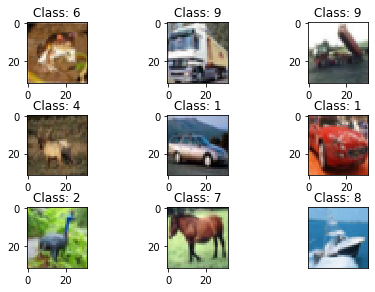

In [6]:
# Displaying some of the 32x32 pixel images contained in the dataset

fig, ax = plt.subplots(3, 3)

counter=0
fig.tight_layout()

for i in range(3):
  for j in range(3):
    _ = ax[i,j].imshow(X_train_full[counter], interpolation='none')
    _ = ax[i,j].set_title('Class: {}'.format(y_train_full[counter][0]))
    _ = plt.xticks([])
    _ = plt.yticks([])
    counter+=1

In [7]:
# Data pre-processing: min max scaling

min = X_train_full.min()
max = X_train_full.max()

min,max

X_train_full = X_train_full/(max-min)
X_test = X_test/(max-min)

(0, 255)

# Section 2 - Generating Model and Training

In [8]:
"""
The fllowing CNN is based on the AlexNet architecture. Deviations from this are outlined and explained in the comments which follow.

AlexNet is designed for 227x227 bit images vs. 32x32 here -> scaling factor will be used: 32/227 ≈ 1/7

Kernel sizes: All dimensions have been reduced to (2,2).
-AlexNet kernel size are <= (11,11), therefore they were reduced for this model using the scaling factor of 1/7.

Strides: All strides have been reduced to (1,1).
-AlexNet uses strides of <= 4, therefore they were reduced for this model using the scaling factor of 1/7.

Dropouts: Dropout has been added after each layer to reduce overfitting due to the higher complexity of AlexNet
 The AlexNet model is made for 1,000 different classes, compared to only 10 classes here.

Scaling factors: Scaling factors used on two layers in order to further reduce model complexity and reduce overfitting
-Scaling factor of 1/4 used on the number of filters of Convolutional Hidden Layer 4.
-Scaling factor of 1/2 used on the flattened Fully Connected Input Layer.

MaxPooling: MaxPooling removed from the final Convolution Layer.
-The image resolutions used in this model are already 1/7th of those used in AlexNet. The final Tensor dimensions are small enough and the final MaxPooling reduces it too much.
"""

def Image_Classifier_Model(X_train, y_train, epoch_number=60, valid_split=0.2):
  K.clear_session()
  tf.random.set_seed(0)
  random.seed(0)

  #Convolutional Input Layer
  input = layers.Input(shape=X_train_full.shape[1:])

  # Convolutional Hidden Layer 1 + MaxPooling 1
  y = layers.Conv2D(filters=round(96), kernel_size=(2,2), strides=(1,1), padding="same", activation="relu")(input)
  y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.2)(y)

  #Convolutional Hidden Layer 2 + MaxPooling 2
  y = layers.Conv2D(filters=round(256), kernel_size=(2,2), strides=(1,1), padding="same", activation="relu")(y)
  y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.2)(y)

  #Convolutional Hidden Layers 3, 4, 5
  y = layers.Conv2D(filters=round(384), kernel_size=(2,2), strides=(1,1), padding="same", activation="relu")(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.5)(y)

  y = layers.Conv2D(filters=round(384), kernel_size=(2,2), strides=(1,1), padding="same", activation="relu")(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.5)(y)

  y = layers.Conv2D(filters=round(256/4), kernel_size=(2,2), strides=(1,1), padding="same", activation="relu")(y)
  y = layers.BatchNormalization()(y)
  #y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(y)


  #Fully Connected Input Layer
  # AlexNet flattened layer goes from 9,216 nodes to 4,096, similar reduction ratio maintained here.
  y = layers.Flatten()(y)
  nodes_no = round((4096/9216)*(1/2)*y.get_shape().as_list()[1])
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.5)(y)

  y = layers.Dense(nodes_no, activation="relu", kernel_initializer='glorot_uniform')(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.5)(y)

  #Fully Connected Hidden Layer 1
  y = layers.Dense(nodes_no, activation="relu", kernel_initializer='glorot_uniform')(y)
  y = layers.BatchNormalization()(y)
  y = layers.Dropout(0.5)(y)

  #Fully Connected Hidden Layer 2 (Softmax output)
  # AlexNet has a softmax of 1000, only 10 needed here
  output = layers.Dense(10, activation='softmax')(y)


  model = models.Model(input, output)

  model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(0.001),
                    metrics=[keras.metrics.sparse_categorical_accuracy])
  
  h = model.fit(X_train, y_train, epochs=epoch_number, batch_size=32, validation_split=valid_split)

  return model, h

model, h = Image_Classifier_Model(X_train_full, y_train_full)
model.summary()

'\nThe fllowing CNN is based on the AlexNet architecture. Deviations from this are outlined and explained in the comments which follow.\n\nAlexNet is designed for 227x227 bit images vs. 32x32 here -> scaling factor will be used: 32/227 ≈ 1/7\n\nKernel sizes: All dimensions have been reduced to (2,2).\n-AlexNet kernel size are <= (11,11), therefore they were reduced for this model using the scaling factor of 1/7.\n\nStrides: All strides have been reduced to (1,1).\n-AlexNet uses strides of <= 4, therefore they were reduced for this model using the scaling factor of 1/7.\n\nDropouts: Dropout has been added after each layer to reduce overfitting due to the higher complexity of AlexNet\n The AlexNet model is made for 1,000 different classes, compared to only 10 classes here.\n\nScaling factors: Scaling factors used on two layers in order to further reduce model complexity and reduce overfitting\n-Scaling factor of 1/4 used on the number of filters of Convolutional Hidden Layer 4.\n-Scaling

Epoch 1/60
1250/1250 [==============================] - 37s 17ms/step - loss: 1.9763 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.3253 - val_sparse_categorical_accuracy: 0.5149
Epoch 2/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3839 - sparse_categorical_accuracy: 0.5090 - val_loss: 1.3094 - val_sparse_categorical_accuracy: 0.5350
Epoch 3/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2155 - sparse_categorical_accuracy: 0.5695 - val_loss: 1.0621 - val_sparse_categorical_accuracy: 0.6259
Epoch 4/60
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1022 - sparse_categorical_accuracy: 0.6116 - val_loss: 1.4954 - val_sparse_categorical_accuracy: 0.5140
Epoch 5/60
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0152 - sparse_categorical_accuracy: 0.6426 - val_loss: 1.0597 - val_sparse_categorical_accuracy: 0.6423
Epoch 6/60
1250/1250 [==============================] - 21s 16ms/step - loss: 0.

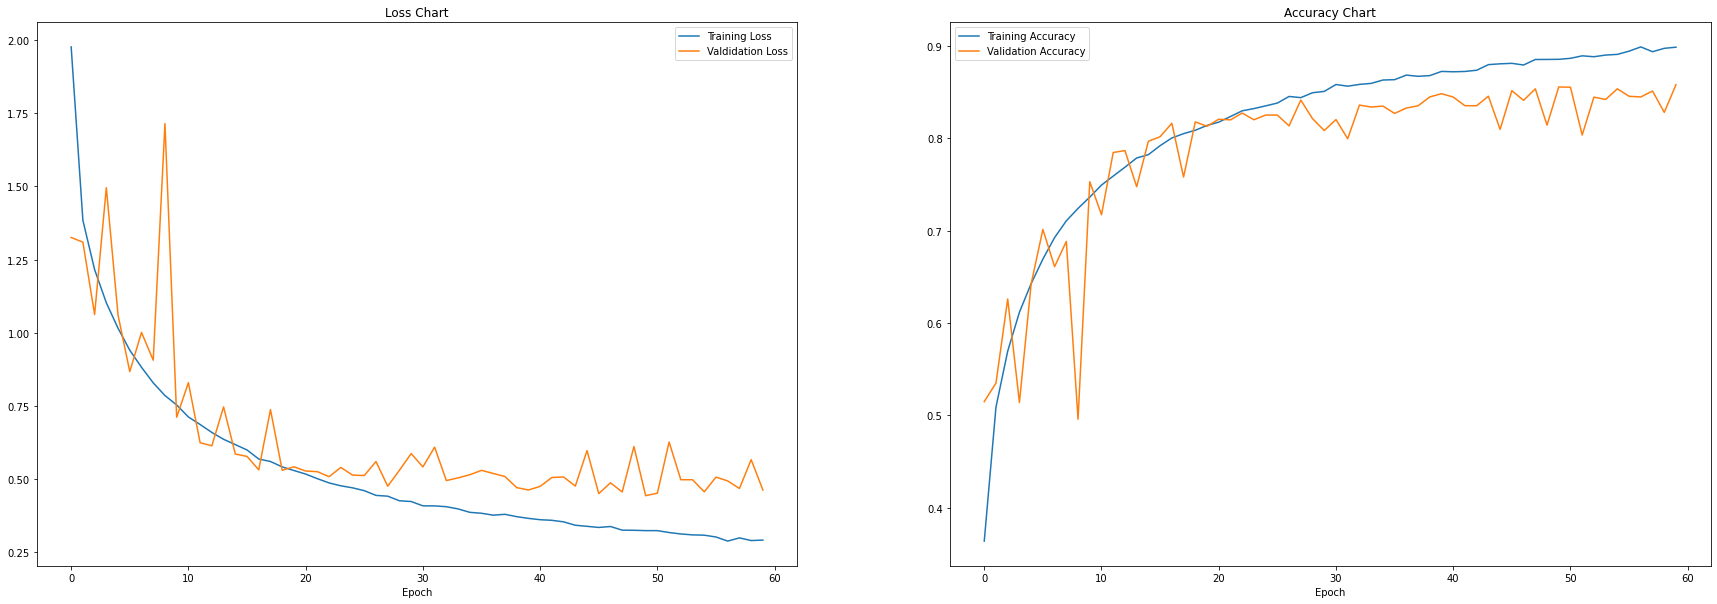

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

_ = ax[0].plot(h.history['loss'], label = 'Training Loss')
_ = ax[0].plot(h.history['val_loss'], label = 'Valdidation Loss')
_ = ax[0].set_xlabel('Epoch')
_ = ax[0].set_title('Loss Chart')
_ = ax[0].legend()

_ = ax[1].plot(h.history['sparse_categorical_accuracy'], label = 'Training Accuracy')
_ = ax[1].plot(h.history['val_sparse_categorical_accuracy'], label = 'Validation Accuracy')
_ = ax[1].set_xlabel('Epoch')
_ = ax[1].set_title('Accuracy Chart')
_ = ax[1].legend()
    
plt.show()

# Section 3 - Final Model and Results

In [10]:
# Training the final model on the entire training dataset (i.e. no validation split) up to the optimum epoch number

val_losses = np.array(h.history['val_loss'])
epoch_number = np.argmin(val_losses) + 1

print('Optimum epoch runs:', epoch_number)

final_model, h_final = Image_Classifier_Model(X_train_full, y_train_full, epoch_number=epoch_number, valid_split=0)

Optimum epoch runs: 50
Epoch 1/50
1563/1563 [==============================] - 30s 15ms/step - loss: 1.8663 - sparse_categorical_accuracy: 0.3863
Epoch 2/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3332 - sparse_categorical_accuracy: 0.5272
Epoch 3/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1527 - sparse_categorical_accuracy: 0.5934
Epoch 4/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0237 - sparse_categorical_accuracy: 0.6409
Epoch 5/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9477 - sparse_categorical_accuracy: 0.6680
Epoch 6/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8705 - sparse_categorical_accuracy: 0.6972
Epoch 7/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8154 - sparse_categorical_accuracy: 0.7150
Epoch 8/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7725 - sparse_categorical_accuracy: 

In [11]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)

print('\n')
print('Test Loss: %s       |   Test Accuracy: %s' % (round(test_loss, 4), round(test_accuracy, 4)))

313/313 [==============================] - 3s 7ms/step - loss: 0.4492 - sparse_categorical_accuracy: 0.8560


Test Loss: 0.4492       |   Test Accuracy: 0.856
